In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import datetime as dt
import requests
import json
#url = 'https://www.energidataservice.dk/proxy/api/datastore_search?resource_id=nordpoolmarket&limit=5'
#response = requests.get(url)
feature_list=['InfoId', 'TrapLabel', 'Area', 'Coordinates_polygon']

LocList=[]
for let in 'ABCDEFGHI':
    LocList.append(let+let)
for let in ['NE','NW','SE','SW']:
    for num in '1234567':
        LocList.append(let+num)
print(LocList)

AreaLocMix=[]
f=json.load(open("JSON/adultMosquitoTrapArea.json"))
for line in f['features']:
    line_list=[]
    line_list.append(line['properties']['trapLocationInfoID'])
    line_list.append(line['properties']['trapLabel'])
    line_list.append(line['properties']['area'])
    line_list.append(line['geometry']['coordinates'])
    AreaLocMix.append(line_list)
    
for i in range(len(AreaLocMix)):
    for j in range(len(AreaLocMix)):
        if j>i:
            if AreaLocMix[i][3][0]==AreaLocMix[j][3][0]:
                print(AreaLocMix[i][1],'=',AreaLocMix[j][1])

#print(AreaLocMix[10])
#print(AreaLocMix[11])
    
PolygonDF=[]    
for i in range(len(AreaLocMix)):
    long=[]
    lat=[]
    for point in AreaLocMix[i][3][0]:
        long.append(point[0])
        lat.append(point[1])
    PolygonDF.append(pd.DataFrame(list(zip(long,lat)), columns=['long', 'lat']))
print(PolygonDF[1].head())

AreaLoc={}
for i in range(len(AreaLocMix)):
    AreaLoc[AreaLocMix[i][1]]=AreaLocMix[i][3][0]
print(len(AreaLocMix))



['AA', 'BB', 'CC', 'DD', 'EE', 'FF', 'GG', 'HH', 'II', 'NE1', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NW1', 'NW2', 'NW3', 'NW4', 'NW5', 'NW6', 'NW7', 'SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SW1', 'SW2', 'SW3', 'SW4', 'SW5', 'SW6', 'SW7']
BB = CC
HH = II
        long        lat
0 -97.040258  50.016223
1 -97.038598  50.019433
2 -97.031871  50.026906
3 -97.108678  50.059985
4 -97.114842  50.063679
37


In [3]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
## point=[x,y], returns [loc_1,loc_2,...] list of closest locations to a point
def LocIdent(point):
    [x,y]=point
    pnt=Point(x,y)
    ans={}
    mmin=10 # choose very large
    for loc in LocList:
        coords=[]
        for i in range(len(AreaLoc[loc])):
            coords.append((AreaLoc[loc][i][0], AreaLoc[loc][i][1]))
        #print(coords)
        poly=Polygon(coords)
        if pnt.within(poly):
            mmin=0
            if 0 in ans:
                ans[0].append(loc)
            else:
                ans[0]=[loc]
        if mmin!=0:
            if poly.exterior.distance(pnt)<=mmin:
                mmin=poly.exterior.distance(pnt)
                if mmin in ans:
                    ans[mmin].append(loc)
                else:
                    ans[mmin]=[loc]
    return ans[mmin]

LocIdent([-97.1,49.9])

['NE4']

(49.51436196574, 50.0736786159233)

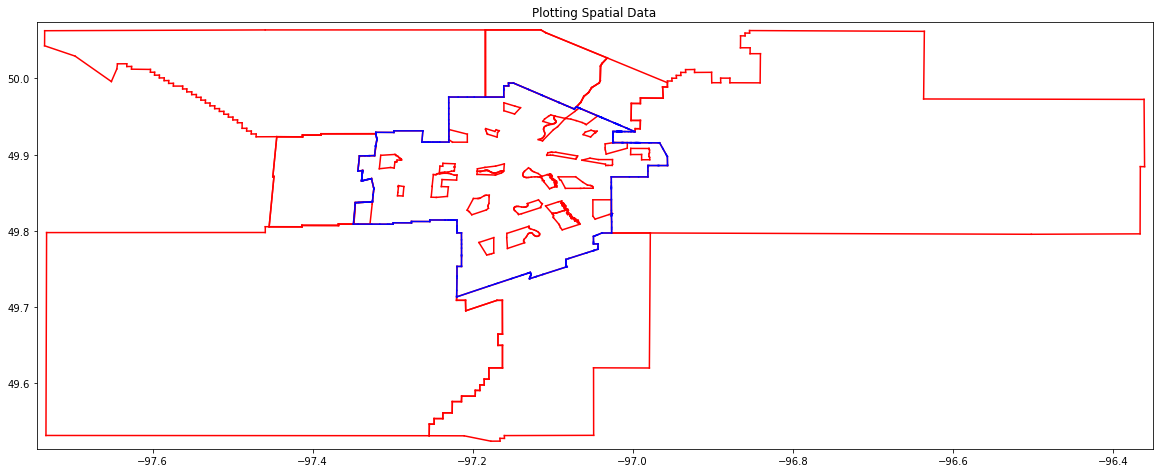

In [5]:
f=json.load(open("JSON/City Limit.geojson"))
AreaCity=f['features'][0]['geometry']['coordinates'][0][0]
long=[]
lat=[]
for i in range(len(AreaCity)):
    for point in AreaCity:
        long.append(point[0])
        lat.append(point[1])

#print(PolygonDF.head())

BBox = [-97.7350689864101, -96.360365195092, 49.52436196574, 50.0636786159233]
ratio=(BBox[3]-BBox[2])/(BBox[1]-BBox[0])
#print(BBox)
fig, ax = plt.subplots(figsize=(20,20*ratio))

for j in range(len(AreaLocMix)):
    long=list(PolygonDF[j]['long'])
    lat=list(PolygonDF[j]['lat'])
    for i in range(len(long)-1):
        x_1=long[i]
        x_2=long[i+1]
        y_1=lat[i]
        y_2=lat[i+1]
        ax.plot([x_1,x_2], [y_1,y_2], c='r')
    x_1=long[len(long)-1]
    x_2=long[0]
    y_1=lat[len(long)-1]
    y_2=lat[0]
    ax.plot([x_1,x_2], [y_1,y_2], c='b')

for i in range(len(AreaCity)-1):
    x_1, y_1=AreaCity[i]
    x_2, y_2=AreaCity[i+1]
    ax.plot([x_1,x_2], [y_1,y_2], c='b')
x_1, y_1=AreaCity[len(AreaCity)-1]
x_2, y_2=AreaCity[0]
ax.plot([x_1,x_2], [y_1,y_2], c='b')

ax.set_title('Plotting Spatial Data')
ax.set_xlim(BBox[0]-0.01,BBox[1]+0.01)
ax.set_ylim(BBox[2]-0.01,BBox[3]+0.01)    
#ax.scatter(PolygonDF['long'], PolygonDF['lat'], zorder=1, alpha= 0.2, c='b', s=10)

#ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')